In [1]:
#Discretizacion del problema. k=Nx.Ny
#vector columna de nx.ny valores.
#matriz de 3x3 (para empezar)

In [2]:
import numpy as np   # Importo paquete de álgebra lineal
import matplotlib.pyplot as plt   # Importo paquete de gráficos
import math   # Importo paquete de funciones matemáticas
import random   # Importo paquete para generar números pseudoaleatorios
import time

In [3]:
#discretizar el problema
Nx= 5
Ny= 5
T_A,T_C,T_D = (75,50,100)
valoresdefault= {'A':75,'B':0,'C':50,'D':100}
contornodefault= {'A':'temp','B':'flujo','C':'temp','D':'temp'}

In [4]:
class Chapa:
    
    def __init__(self, Nx=3, Ny=3):
        self.Nx= Nx
        self.Ny =Ny
        self.Nk =Nx*Ny
        self.beta = Nx/Ny
        self.bordeB= np.linspace(0,self.Nx-1,self.Nx).astype(int)
        self.bordeD= np.linspace(self.Nk-self.Nx,self.Nx*self.Ny-1,self.Nx).astype(int)
        self.bordeA= np.linspace(0,self.Nk-self.Nx,self.Ny).astype(int)
        self.bordeC= np.linspace(self.Nx-1,self.Nk-1,self.Ny).astype(int)
    def makematrix(self,TC= valoresdefault,tipocontorno= contornodefault):
        Nx=self.Nx
        Ny=self.Ny
        Nk=self.Nk
        beta=self.beta
        self.TC=TC
        self.tipocontorno= tipocontorno
        M= np.identity(Nx*Ny)
        b= np.zeros((Nx*Ny,1))
        for k in range(Nk):
            if k==0:
                if self.tipocontorno['A']=='temp' and self.tipocontorno['B']=='flujo':
                    # Dejo el valor de temperatura.
                    b[k] = TC['A']
                elif self.tipocontorno['A']=='flujo' and self.tipocontorno['B']=='temp':
                    # Dejo el valor de temperatura.
                    b[k] = TC['B']
                else:
                    b[k]= (TC['A']+TC['B'])/2

            elif k==(Nx-1):
                if self.tipocontorno['B']=='temp' and self.tipocontorno['C']=='flujo':
                    # Dejo el valor de temperatura.
                    b[k] = TC['B']
                elif self.tipocontorno['B']=='flujo' and self.tipocontorno['C']=='temp':
                    # Dejo el valor de temperatura.
                    b[k] = TC['C']
                else:
                    b[k]= (TC['C']+TC['B'])/2

            elif k== (Nk-Nx):
                if self.tipocontorno['D']=='temp' and self.tipocontorno['A']=='flujo':
                    # Dejo el valor de temperatura.
                    b[k] = TC['D']
                elif self.tipocontorno['D']=='flujo' and self.tipocontorno['A']=='temp':
                    # Dejo el valor de temperatura.
                    b[k] = TC['A']
                else:                
                    b[k]= (TC['A']+TC['D'])/2

            elif k==(Nk-1):
                if self.tipocontorno['C']=='temp' and self.tipocontorno['D']=='flujo':
                    # Dejo el valor de temperatura.
                    b[k] = TC['C']
                elif self.tipocontorno['C']=='flujo' and self.tipocontorno['D']=='temp':
                    # Dejo el valor de temperatura.
                    b[k] = TC['D']
                else:
                    b[k]= (TC['D']+TC['C'])/2

            elif k in self.bordeB:
                b[k]= TC['B']
                if self.tipocontorno['B'] == 'flujo':
                    M[k,k]= -2*(1+ beta**2)
                    M[k,k+1]= 1
                    M[k,k-1]= 1
                    M[k,k+Nx]= 2*beta**2
            elif k in self.bordeD:
                b[k]= TC['D']
                if self.tipocontorno['D'] == 'flujo':
                    M[k,k]= -2*(1+ beta**2)
                    M[k,k-1]= 1
                    M[k,k+1]= 1
                    M[k,k-Nx]= 2*beta**2
                    #M[k,k+Nx]= beta**2
            elif k in self.bordeA:
                #if self.tipocontorno == 'temp': entra en TC el flujo
                b[k]= TC['A']
                if self.tipocontorno['A'] == 'flujo':
                    M[k,k]= -2*(1+ beta**2)
                    M[k,k+1]= 2
                    M[k,k-Nx]= beta**2
                    M[k,k+Nx]= beta**2
                
            elif k in self.bordeC:
                b[k]= TC['C']
                if self.tipocontorno['C'] == 'flujo':
                    M[k,k]= -2*(1+ beta**2)
                    M[k,k-1]= 2
                    M[k,k-Nx]= beta**2
                    M[k,k+Nx]= beta**2
            else:
                M[k,k]= -2*(1+ beta**2)
                M[k,k-1]= 1
                M[k,k+1]= 1
                M[k,k-Nx]= beta**2
                M[k,k+Nx]= beta**2
        self.M=M
        self.b=b
        return M,b

In [5]:
C=Chapa(Nx,Ny)

In [6]:
M,b= C.makematrix()

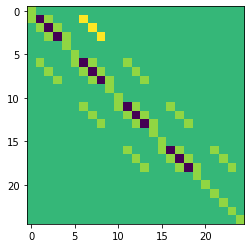

In [7]:
plt.imshow(M)

## Solucion

In [8]:
Temp= np.linalg.solve(M,b)


In [9]:

Temp_plot= Temp.reshape(Nx,Ny)

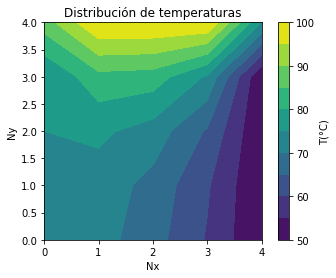

In [10]:
lvl = np.linspace(50, 100, 11)
mapable = plt.contourf(Temp_plot, levels=lvl)
plt.gca().set_aspect('equal')
cbar = plt.colorbar(mapable)
cbar.set_label('T(°C)')
plt.title('Distribución de temperaturas')
plt.xlabel('Nx')
plt.ylabel('Ny')
plt.show()

## Flujos

In [11]:
def getheat(T, dx, dy):
    # El flujo en cada nodo tendrá una componente "x" e "y", por lo que uso "_like" para que me cree vectores "Qx" y "Qy" del
    # mismo tamaño que "T", así podré poner las respectivas componentes en "x" e "y".
    Qx = np.zeros_like(T)
    Qy = np.zeros_like(T)
    N = len(T)
    
    for k in range(N):
        
        # Borde izq. (A)
        if k%Nx==0:
            # Tomo cociente incremental hacia la derecha, ya que para la izquierda no hay nada y no puedo tomar cociente 
            # incremental centrado.
            Qx[k] = (T[k+1]-T[k])/dx
        # Borde der. (C)
        elif (k+1)%Nx==0:
            # Tomo cociente incremental hacia la izquierda, ya que para la derecha no hay nada y no puedo tomar cociente 
            # incremental centrado.
            Qx[k] = (T[k]-T[k-1])/dx
        # Nodos internos y los otros bordes
        else:
            # Tomo cociente incremental centrado, ya que tengo elementos a izquierda y derecha.
            Qx[k] = (T[k+1]-T[k-1])/(2*dx)
            
    for k in range (N):
        
        # Borde inf. (B)
        if k<Nx-1:
            # Tomo cociente incremental hacia arriba, ya que para abajo no hay nada y no puedo tomar cociente 
            # incremental centrado.
            Qy[k] = (T[k+Nx]-T[k])/dy 
        # Borde sup. (D)
        elif k>Nx*(Ny-1)-1:
            # Tomo cociente incremental hacia abajo, ya que para arriba no hay nada y no puedo tomar cociente 
            # incremental centrado.
            Qy[k] = (T[k]-T[k-Nx])/dy
        # Nodos internos y los otros bordes
        else:
            # Tomo cociente incremental centrado, ya que tengo elementos abajo y arriba.
            Qy[k] = (T[k+Nx]-T[k-Nx])/(2*dy)
    
    return Qx, Qy

In [12]:
dx = 1/(Nx-1)
dy = 1/(Ny-1)

Qx, Qy = getheat(Temp, dx, dy)

In [13]:
# Defino grilla de tamaño "Nx*Ny", con espaciados de "1" tanto en el eje x como en el eje y.
x = np.arange(Nx)
y = np.arange(Ny)
X, Y = np.meshgrid(x, y)

# Tomo los vectores "Qx" y "Qy" y los convierto en matrices de tamaño "Nx*Ny", para que vayan de 0 a Nx-1 en el eje x, y de 0
# a Ny-1 en el eje y (sino a este último lo haría de Ny-1 a 0 y graficaría MAL).
Qx_matriz = Qx.reshape(Nx, Ny)
Qy_matriz = Qy.reshape(Nx, Ny)

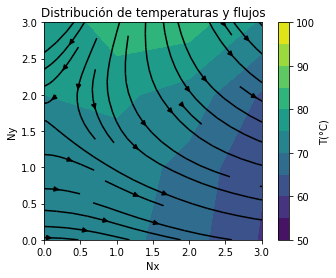

In [14]:
mapable = plt.contourf(Temp_plot, levels=lvl)
plt.streamplot(X, Y, -Qx_matriz, -Qy_matriz, color='k', density=0.6)
plt.gca().set_aspect('equal')
cbar = plt.colorbar(mapable)
cbar.set_label('T(°C)')
plt.title('Distribución de temperaturas y flujos')
plt.xlabel('Nx')
plt.ylabel('Ny')
plt.axis([0, Nx-2, 0, Ny-2])   # Sino me deja líneas en blanco, muy raro.
plt.show()

In [15]:
Ns = np.arange(3, 100, 6)
ts = []

In [16]:
for Ni in Ns:
    chapa_i = Chapa(Ni, Ni)
    M, b = chapa_i.makematrix(valoresdefault, contornodefault)
    t_1 = time.time()
    T = np.linalg.solve(M, b)
    T_matriz = T.reshape(Ni, Ni)
    t_2 = time.time()
    ts.append(t_2-t_1)

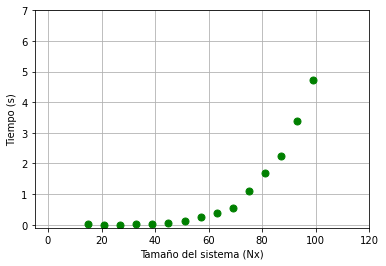

In [22]:
plt.plot(Ns[2:], ts[2:], 'og', ms=7)
plt.xlabel('Tamaño del sistema (Nx)')
plt.ylabel('Tiempo (s)')
plt.grid('on')
plt.axis([-5, 120, -0.1, 7])
plt.show()